<a href="https://colab.research.google.com/github/Shrutiba/iisc_cds/blob/main/Group10_M2_NB_MiniProject_1_LinearRegression_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Mini-Project: Linear Regression with Regularization

## Problem Statement

Predict the bike-sharing counts per hour based on the features including weather, day, time, humidity, wind speed, season e.t.c.

## Learning Objectives

At the end of the mini-project, you will be able to :

* perform data exploration and visualization
* implement linear regression using sklearn and optimization
* apply regularization on regression using Lasso, Ridge and Elasticnet techniques
* calculate and compare the MSE value of each regression technique
* analyze the features that are best contributing to the target

### Dataset

The dataset chosen for this mini-project is [Bike Sharing Dataset](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset).  This dataset contains the hourly and daily count of rental bikes between the years 2011 and 2012 in the capital bike share system with the corresponding weather and seasonal information. This dataset consists of 17389 instances of 16 features.

Bike sharing systems are a new generation of traditional bike rentals where the whole process from membership, rental and return has become automatic. Through these systems, the user can easily rent a bike from a particular position and return to another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousand bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. As opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position are explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that the most important events in the city could be detected via monitoring these data.

<img src="https://s26551.pcdn.co/wp-content/uploads/2012/02/resize-va-sq-bikeshare.jpg" alt="drawing" width="400"/>

### Data Fields

* dteday - hourly date
* season - 1:winter, 2:spring, 3:summer, 4:fall
* hr - hour
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weathersit -<br>
    1 - Clear, Few clouds, Partly cloudy, Partly cloudy <br>
    2 - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
    3 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
    4 - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog<br>   
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* cnt - number of total rentals

## Information

**Regularization:** It is a form of regression that shrinks the coefficient estimates towards zero. In other words, this technique discourages learning a more complex or flexible model, to avoid the risk of overfitting. A simple relation for linear regression looks like this.

$Y ≈ β_0 + β_1 X_1 + β_2 X_2 + …+ β_p X_p$

 Here $Y$ represents the learned relation and $β$ represents the coefficient estimates for different variables or predictors(X).

 If there is noise in the training data, then the estimated coefficients won’t generalize well to the future data. This is where regularization comes in and shrinks or regularizes these learned estimates towards zero.

Below are the Regularization techniques:

 * Ridge Regression
 * Lasso Regression
 * Elasticnet Regression

## Grading = 10 Points

In [ ]:
#@title Download the dataset
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/Bike_Sharing_Dataset.zip
!unzip Bike_Sharing_Dataset.zip

Archive:  Bike_Sharing_Dataset.zip
  inflating: Readme.txt              
  inflating: day.csv                 
  inflating: hour.csv                


#### Importing Necessary Packages

In [ ]:
# Loading the Required Packages
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score

### Data Loading

In [ ]:
# Read the hour.csv file
# YOUR CODE HERE
df = pd.read_csv('hour.csv')


print the first five rows of dataset

In [ ]:
# YOUR CODE HERE
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


print the datatypes of the columns

In [ ]:
# YOUR CODE HERE
df.dtypes

,0
instant,int64
dteday,object
season,int64
yr,int64
mnth,int64
hr,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64


### Task flow with respect to feature processing and model training

* Explore and analyze the data

* Identify continuous features and categorical features

* Apply scaling on continuous features and one-hot encoding on categorical features

* Separate the features, targets and split the data into train and test

* Find the coefficients of the features using normal equation and find the cost (error)

* Apply batch gradient descent technique and find the best coefficients

* Apply SGD Regressor using sklearn

* Apply linear regression using sklearn

* Apply Lasso, Ridge, Elasticnet Regression

### EDA &  Visualization ( 2 points)

#### Visualize the hour (hr) column with an appropriate plot and find the busy hours of bike sharing

<Axes: xlabel='hr', ylabel='cnt'>

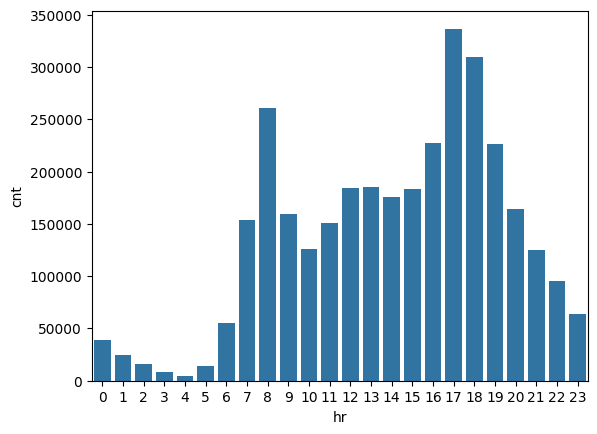

In [ ]:
# YOUR CODE HERE
sns.barplot(df.groupby('hr')['cnt'].sum())

#### Visualize the distribution of count, casual and registered variables

<Axes: xlabel='cnt', ylabel='Count'>

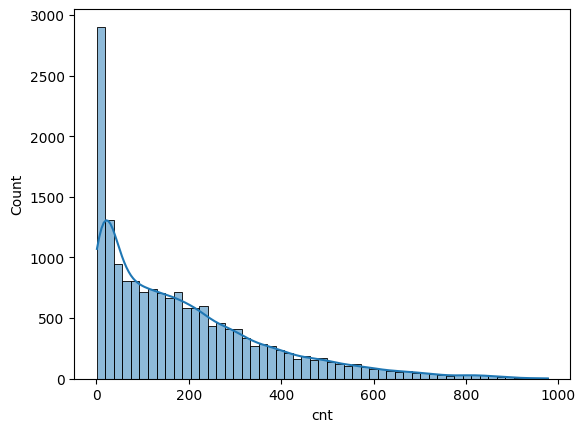

In [ ]:
# YOUR CODE HERE for distribuiton of count variable
sns.histplot(df['cnt'], kde = True)

<Axes: xlabel='casual', ylabel='Count'>

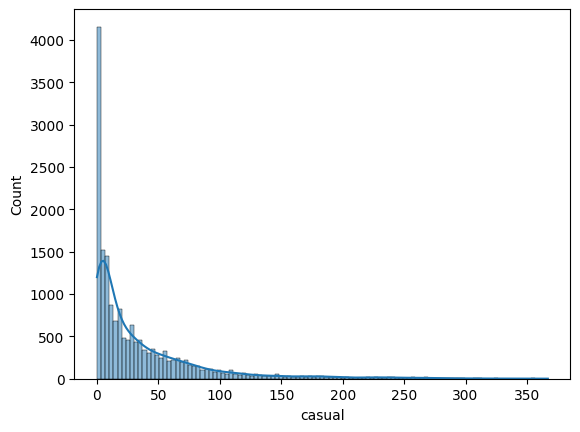

In [ ]:
# YOUR CODE HERE for distribuiton of casual variable
sns.histplot(df['casual'], kde = True)

<Axes: xlabel='registered', ylabel='Count'>

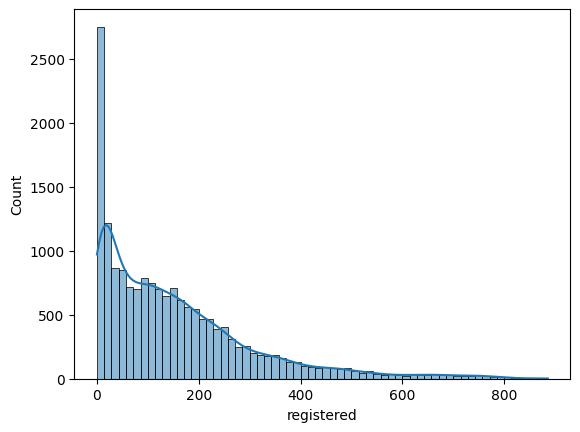

In [ ]:
# YOUR CODE HERE for distribuiton of registered variable
sns.histplot(df['registered'], kde = True)

#### Describe the relation of weekday, holiday and working day

In [ ]:
# YOUR CODE HERE
cross_tab = pd.crosstab(df['weekday'], [df['holiday'], df['workingday']])
print(cross_tab)

holiday        0          1
workingday     0     1    0
weekday                    
0           2502     0    0
1              0  2122  357
2              0  2430   23
3              0  2451   24
4              0  2423   48
5              0  2439   48
6           2512     0    0


#### Visualize the month wise count of both casual and registered for the year 2011 and 2012 separately.

Hint: Stacked barchart

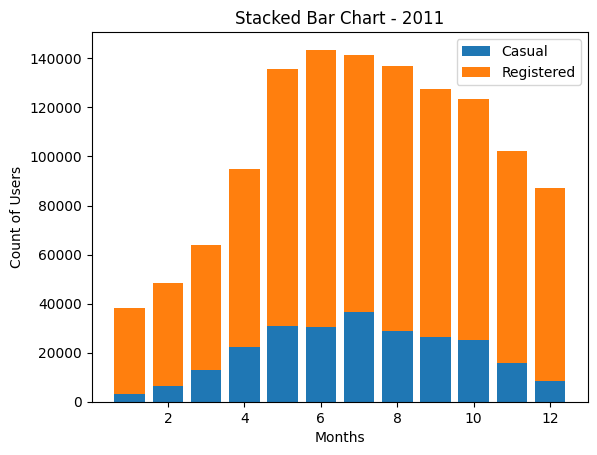

In [ ]:
# stacked bar chart for year 2011
# YOUR CODE HERE
xaxis = df['mnth'].unique()

casual_monthwise_sum = df[df['yr'] == 0].groupby('mnth')['casual'].sum()
registered_monthwise_sum = df[df['yr'] == 0].groupby('mnth')['registered'].sum()

plt.bar(xaxis, casual_monthwise_sum, label = 'Casual')
plt.bar(xaxis, registered_monthwise_sum, bottom=casual_monthwise_sum, label = 'Registered')

plt.xlabel("Months")
plt.ylabel("Count of Users")
plt.title("Stacked Bar Chart - 2011")
plt.legend()
plt.show()


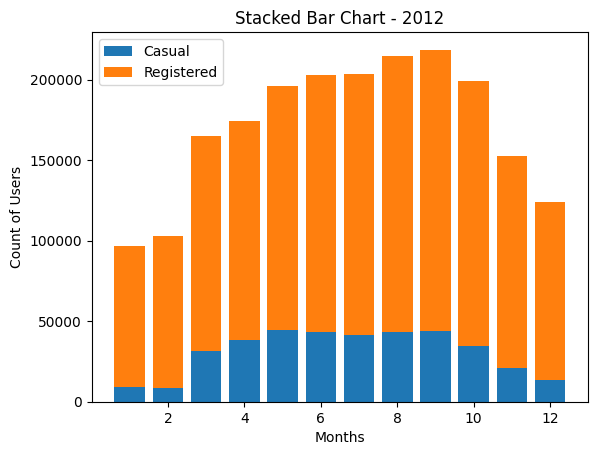

In [ ]:
# stacked bar chart for year 2012
# YOUR CODE HERE
xaxis = df['mnth'].unique()

casual_monthwise_sum = df[df['yr'] == 1].groupby('mnth')['casual'].sum()
registered_monthwise_sum = df[df['yr'] == 1].groupby('mnth')['registered'].sum()

plt.bar(xaxis, casual_monthwise_sum, label = 'Casual')
plt.bar(xaxis, registered_monthwise_sum, bottom=casual_monthwise_sum, label = 'Registered')

plt.xlabel("Months")
plt.ylabel("Count of Users")
plt.title("Stacked Bar Chart - 2012")
plt.legend()
plt.show()


#### Analyze the correlation between features with heatmap

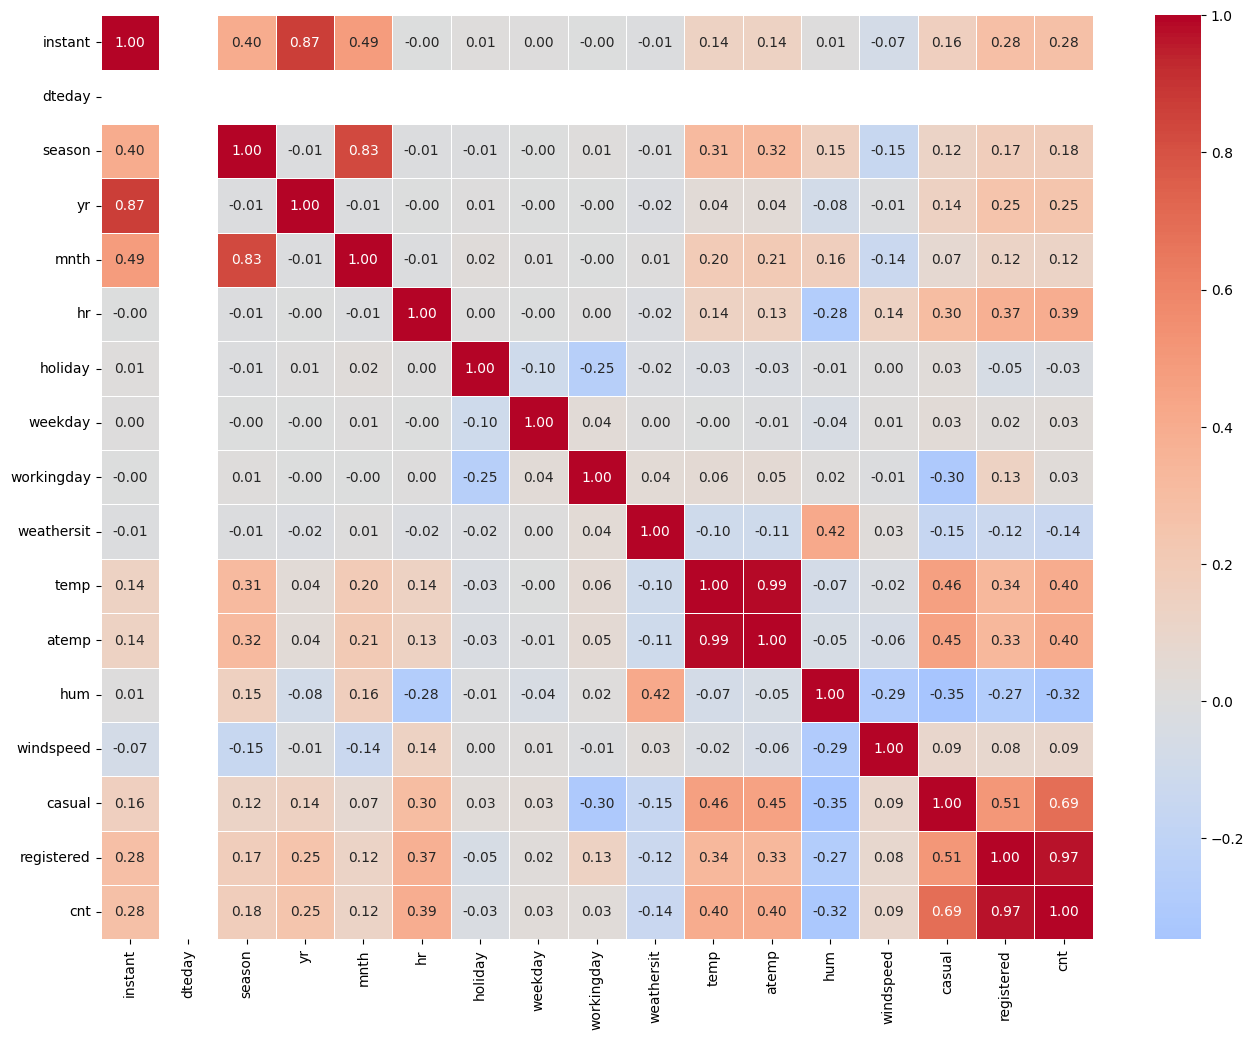

In [ ]:
# YOUR CODE HERE
df1 = df.apply(pd.to_numeric, errors='coerce')
plt.figure(figsize=(16, 12))
sns.heatmap(df1.corr(), annot=True, linewidth=0.5, center=0, fmt='.2f',cmap='coolwarm')
plt.show()

#### Visualize the box plot of casual and registered variables to check the outliers

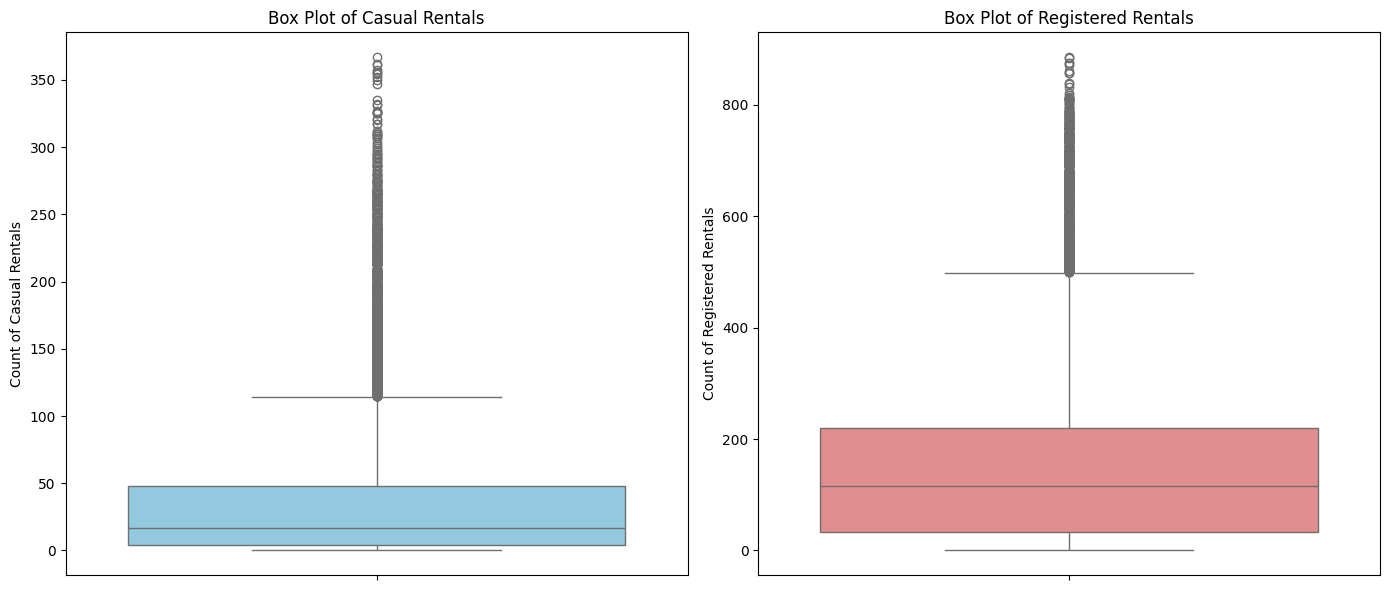

In [ ]:
# YOUR CODE HERE
plt.figure(figsize=(14, 6))
# Box plot for 'casual' rentals
plt.subplot(1, 2, 1)
sns.boxplot(y=df['casual'], color='skyblue')
plt.title('Box Plot of Casual Rentals')
plt.ylabel('Count of Casual Rentals')
# Box plot for 'registered' rentals
plt.subplot(1, 2, 2)
sns.boxplot(y=df['registered'], color='lightcoral')
plt.title('Box Plot of Registered Rentals')
plt.ylabel('Count of Registered Rentals')
plt.tight_layout()
plt.show()

### Pre-processing and Data Engineering (1 point)

#### Drop unwanted columns

In [ ]:
# YOUR CODE HERE
df_new = df.drop(['instant', 'dteday','temp'], axis=1)
df_new2 = df.drop(['instant', 'dteday','temp'], axis=1)

#### Identify categorical and continuous variables


In [ ]:
# YOUR CODE HERE
# Identify categorical variables
categorical_vars = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
# Identify continuous variables
continuous_vars = ['atemp', 'hum', 'windspeed', 'casual','registered','cnt']
# Print the categorical and continuous variables
print("Categorical Variables:", categorical_vars)
print("Continuous Variables:", continuous_vars)

Categorical Variables: ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
Continuous Variables: ['atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


#### Feature scaling

Feature scaling is essential for machine learning algorithms, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance. Apply scaling on the continuous variables on the given data.

Hint: `MinMaxScaler` or `StandardScaler`



In [ ]:
# YOUR CODE HERE
from sklearn.preprocessing import MinMaxScaler
# Initialize MinMaxScaler
min_max_scaler = MinMaxScaler()
print(df_new[continuous_vars].head())
# Apply MinMaxScaler to continuous variables
df_new[continuous_vars] = min_max_scaler.fit_transform(df_new[continuous_vars])
# Display the first few rows to confirm
print(df_new[continuous_vars].head())

    atemp   hum  windspeed  casual  registered  cnt
0  0.2879  0.81        0.0       3          13   16
1  0.2727  0.80        0.0       8          32   40
2  0.2727  0.80        0.0       5          27   32
3  0.2879  0.75        0.0       3          10   13
4  0.2879  0.75        0.0       0           1    1
    atemp   hum  windspeed    casual  registered       cnt
0  0.2879  0.81        0.0  0.008174    0.014673  0.015369
1  0.2727  0.80        0.0  0.021798    0.036117  0.039959
2  0.2727  0.80        0.0  0.013624    0.030474  0.031762
3  0.2879  0.75        0.0  0.008174    0.011287  0.012295
4  0.2879  0.75        0.0  0.000000    0.001129  0.000000


In [ ]:
# YOUR CODE HERE
from sklearn.preprocessing import MinMaxScaler
# Initialize MinMaxScaler
standard_scaler = StandardScaler()
print(df_new2[continuous_vars].head())
# Apply Standard Scaler to continuous variables
df_new2[continuous_vars] = standard_scaler.fit_transform(df_new2[continuous_vars])
# Display the first few rows to confirm
print(df_new2[continuous_vars].head())

    atemp   hum  windspeed  casual  registered  cnt
0  0.2879  0.81        0.0       3          13   16
1  0.2727  0.80        0.0       8          32   40
2  0.2727  0.80        0.0       5          27   32
3  0.2879  0.75        0.0       3          10   13
4  0.2879  0.75        0.0       0           1    1
      atemp       hum  windspeed    casual  registered       cnt
0 -1.093281  0.947372  -1.553889 -0.662755   -0.930189 -0.956339
1 -1.181732  0.895539  -1.553889 -0.561343   -0.804655 -0.824022
2 -1.181732  0.895539  -1.553889 -0.622190   -0.837690 -0.868128
3 -1.093281  0.636370  -1.553889 -0.662755   -0.950010 -0.972879
4 -1.093281  0.636370  -1.553889 -0.723603   -1.009474 -1.039037


#### Apply one-hot encode on the categorical data

One-hot encoding is applied on the categorical variables, which should not have a different weight or order attached to them, it is presumed that all categorical variables have equivalent "values". This means that you cannot simply order them from zero to the number of categories as this would imply that the earlier categories have less "value" than later categories.

Hint: `sklearn.preprocessing.OneHotEncoder`

In [ ]:
# YOUR CODE HERE
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first') # drop='first' to avoid multicollinearity
# Fit and transform the categorical variables
encoded_vars = one_hot_encoder.fit_transform(df_new[categorical_vars])
# Get the feature names for the encoded variables
encoded_feature_names = one_hot_encoder.get_feature_names_out(categorical_vars)
# Create a DataFrame for the encoded variables
encoded_df = pd.DataFrame(encoded_vars, columns=encoded_feature_names)
# Ensure the indices align to avoid concatenation issues
encoded_df.index = df_new.index
# Concatenate the encoded variables with the original DataFrame (dropping original categorical variables)
df_encoded = pd.concat([df_new.drop(columns=categorical_vars), encoded_df], axis=1)
# Display the first few rows of the new DataFrame
print(df_encoded.columns)
print(encoded_vars.shape)
print(df_encoded.head(30))



Index(['atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt', 'season_2',
       'season_3', 'season_4', 'yr_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5',
       'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12',
       'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9',
       'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17',
       'hr_18', 'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23', 'holiday_1',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'workingday_1', 'weathersit_2', 'weathersit_3',
       'weathersit_4'],
      dtype='object')
(17379, 49)
     atemp   hum  windspeed    casual  registered       cnt  season_2  \
0   0.2879  0.81   0.000000  0.008174    0.014673  0.015369       0.0   
1   0.2727  0.80   0.000000  0.021798    0.036117  0.039959       0.0   
2   0.2727  0.80   0.000000  0.013624    0.030474  0.031762       0.0   
3   0.2879  0.75   0.000000  0.008174   

#### Specify features and targets after applying scaling and one-hot encoding

In [ ]:
# YOUR CODE HERE
X = df_encoded[['atemp', 'hum', 'windspeed','season_2',
       'season_3', 'season_4', 'yr_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5',
       'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12',
       'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9',
       'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17',
       'hr_18', 'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23', 'holiday_1',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'workingday_1', 'weathersit_2', 'weathersit_3',
       'weathersit_4']]

y = df_encoded[['cnt']]

### Implement the linear regression by finding the coefficients using below approaches (2 points)

* Find the coefficients using normal equation

* (Optional) Implement batch gradient descent

* (Optional) SGD Regressor from sklearn

#### Select the features and target and split the dataset

As there are 3 target variables, choose the count (`cnt`) variable.

In [ ]:
# YOUR CODE HERE
# Split the dataset into training and testing sets without stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (13903, 52)
X_test shape: (3476, 52)
y_train shape: (13903, 1)
y_test shape: (3476, 1)


#### Implementation using Normal Equation

$\theta = (X^T X)^{-1} . (X^T Y)$

$θ$ is the hypothesis parameter that defines the coefficients

$X$ is the input feature value of each instance

$Y$ is Output value of each instance

For performing Linear Regression Using the Normal Equation refer [here](https://cdn.iisc.talentsprint.com/CDS/Assignments/Module2/M2_SNB_MiniProject_1_LinearRegression_Regularization_Performing%20Linear%20Regression%20using%20Normal%20equation.pdf).

To solve the normal equation compute least-squares solution by using `scipy.linalg`

Hint: [scipy.linalg.lstsq](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html)

In [ ]:
# YOUR CODE HERE
from scipy.linalg import lstsq

# Add a column of ones to X for the intercept term
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add intercept term
print(X_b.shape)

# Compute the coefficients using the normal equation
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

column_names = ['intercept'] + X.columns.tolist()

ne_df = pd.DataFrame(theta_best,index=column_names)
ne_df

(17379, 53)


,0
intercept,-0.186275
atemp,0.277859
hum,-0.129368
windspeed,-0.028264
season_2,0.044131
season_3,0.048763
season_4,0.034406
yr_1,0.086501
mnth_2,0.004481
mnth_3,0.005946


#### (Optional) Implementing Linear regression using batch gradient descent

Initialize the random coefficients and optimize the coefficients in the iterative process by calculating cost and finding the gradient.

Hint: [gradient descent](https://cdn.iisc.talentsprint.com/CDS/Assignments/Module2/M2_SNB_MiniProject_1_LinearRegression_Regularization_Multivariate%20Linear%20Regression.pdf)

In [ ]:
# YOUR CODE HERE
def cost_function(X,y,B):
    m = len(y)
    J = np.sum((X.dot(B) - y)**2)/m
    return J


In [ ]:
def batch_gradient_descent(X,y,B,alpha, iterations):
    cost_history = [0] * iterations
    m = len(y)
    y_flatten = y.values.ravel()

    for iteration in range(iterations):
        # Hypothesis Value
        h = X.dot(B)
        loss = h - y_flatten
        gradient = X.T.dot(loss)/m
        # Changing Values of B using Gradient
        B = B - alpha * gradient
        cost = cost_function(X,y_flatten,B)
        cost_history[iteration] = cost

    return B, cost_history



In [ ]:
B = np.zeros(X_train.shape[1])
print(B.shape)
alpha = 0.005
iter_ = 2000
newB, cost_history = batch_gradient_descent(X_train,y_train,B,alpha,iter_)
print(newB)
print(cost_history)

(52,)
atemp           0.122595
hum            -0.018716
windspeed       0.047072
season_2        0.046482
season_3        0.057182
season_4        0.054248
yr_1            0.096364
mnth_2         -0.007144
mnth_3          0.003209
mnth_4          0.008038
mnth_5          0.023040
mnth_6          0.025651
mnth_7          0.016068
mnth_8          0.019344
mnth_9          0.028974
mnth_10         0.028791
mnth_11         0.004595
mnth_12        -0.003084
hr_1           -0.048000
hr_2           -0.052537
hr_3           -0.052060
hr_4           -0.056646
hr_5           -0.052215
hr_6           -0.032098
hr_7            0.015233
hr_8            0.068057
hr_9            0.016963
hr_10           0.000877
hr_11           0.011288
hr_12           0.027899
hr_13           0.028332
hr_14           0.019905
hr_15           0.024355
hr_16           0.047769
hr_17           0.102177
hr_18           0.084680
hr_19           0.047486
hr_20           0.018995
hr_21           0.000148
hr_22          -0.0

#### (Optional) SGD Regressor

Scikit-learn API provides the SGDRegressor class to implement SGD method for regression problems. The SGD regressor applies regularized linear model with SGD learning to build an estimator. A regularizer is a penalty (L1, L2, or Elastic Net) added to the loss function to shrink the model parameters.

* Import SGDRegressor from sklearn and fit the data

* Predict the test data and find the error

Hint: [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)

In [ ]:
# YOUR CODE HERE


### Linear regression using sklearn (3 points)

Implement the linear regression model using sklearn

* Import Linear Regression and fit the train data

* Predict the test data and find the error

Hint: [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [ ]:
# YOUR CODE HERE
# Initialize the linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# Fit the model on the training data
lr.fit(X_train, y_train)
print(X_test.shape)

(3476, 52)


In [ ]:
# YOUR CODE HERE
# Predict the test data
y_pred = lr.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
# Display the errors
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.010603570216713367


#### Calculate the $R^2$ (coefficient of determination) of the actual and predicted data

In [ ]:
# YOUR CODE HERE
# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2}")

R-squared Score: 0.6810176758661934


#### Summarize the importance of features

Prediction is the weighted sum of the input values e.g. linear regression. Regularization, such as ridge regression and the elastic net, find a set of coefficients to use in the weighted sum to make a prediction. These coefficients can be used directly as a crude type of feature importance score.
This assumes that the input variables have the same scale or have been scaled prior to fitting a model.

Use the coefficients obtained through the sklearn Linear Regression implementation and create a bar chart of the coefficients.

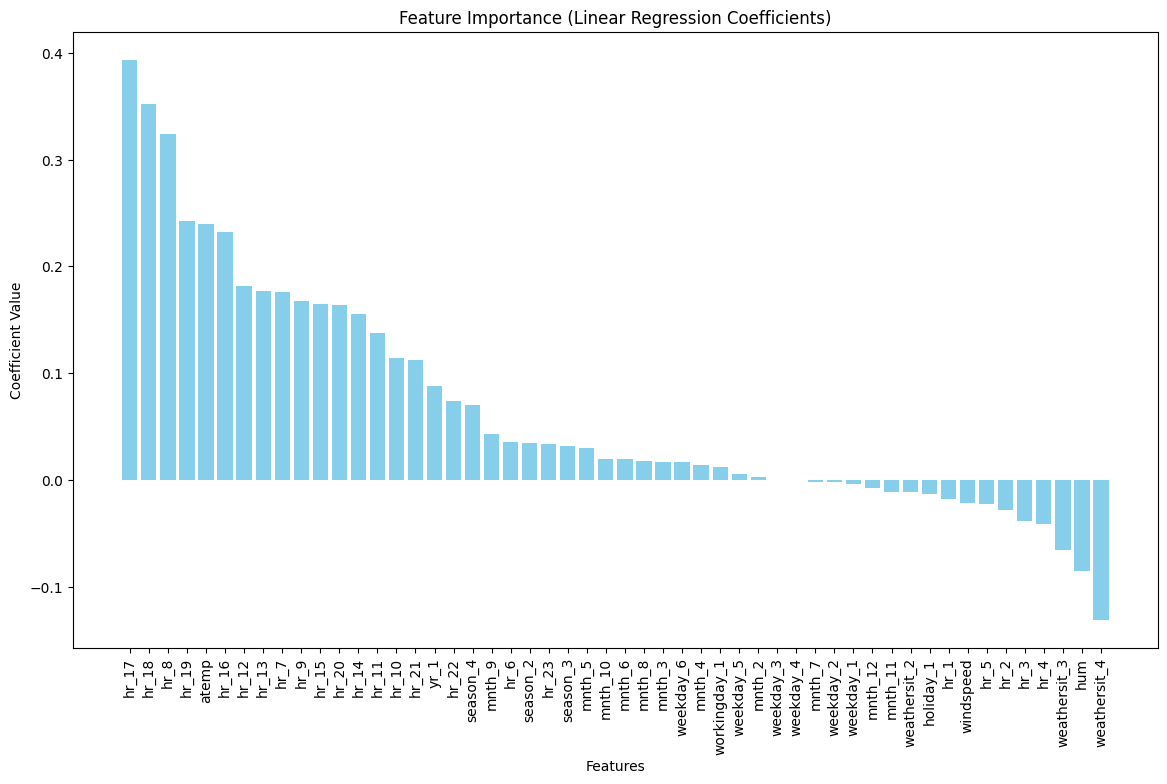

In [ ]:
#from functools import lru_cache

# Obtain the coefficients
coefficients = lr.coef_.ravel()
# Display the coefficients
# Create a DataFrame for the coefficients
features = temp = X_train.columns.tolist()
coef_df = pd.DataFrame(
    {'Feature': features,
    'Coefficient': coefficients }
)
# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
# Plot the coefficients as a bar chart
plt.figure(figsize=(14, 8))
plt.bar(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Feature Importance (Linear Regression Coefficients)')
plt.xticks(rotation=90)
plt.show()

### Regularization methods (2 points)

#### Apply Lasso regression

* Apply Lasso regression with different alpha values given below and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

Hint: [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

In [ ]:
# setting up alpha
alpha = [0.0001, 0.001,0.01, 0.1, 1, 10, 100]

In [ ]:
# YOUR CODE HERE
from sklearn.linear_model import Lasso

r2_ls = {}

for i, a in enumerate(alpha):
    ls = Lasso(a)
    ls.fit(X_train,y_train)
    y_pred_lr = ls.predict(X_test)
    r2_ls[a] = r2_score(y_test,y_pred_lr)

min_value = max(r2_ls.values())
min_alpha = [key for key, val in r2_ls.items() if val == min_value][0]
print(f"Minimum loss {min_value}, with Alpha {min_alpha}")



Minimum loss 0.6804709500009651, with Alpha 0.0001


#### Apply Ridge regression

* Apply Ridge regression with different alpha values given and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

Hint: [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

In [ ]:
# YOUR CODE HERE
from sklearn.linear_model import Ridge

r2_ls = {}

for i, a in enumerate(alpha):
    l_ridge = Ridge(a)
    l_ridge.fit(X_train,y_train)
    y_pred_lr = l_ridge.predict(X_test)
    r2_ls[a] = r2_score(y_test,y_pred_lr)

min_value = max(r2_ls.values())
min_alpha = [key for key, val in r2_ls.items() if val == min_value][0]
print(f"Minimum loss {min_value}, with Alpha {min_alpha}")



Minimum loss 0.6811839976042519, with Alpha 1


#### Apply Elasticnet regression

* Apply Elasticnet regression with different alpha values given and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

Hint: [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)

In [ ]:
# YOUR CODE HERE
from sklearn.linear_model import ElasticNet

r2_ls = {}

for i, a in enumerate(alpha):
    l_en = ElasticNet(a)
    l_en.fit(X_train,y_train)
    y_pred_lr = l_en.predict(X_test)
    r2_ls[a] = r2_score(y_test,y_pred_lr)

min_value = max(r2_ls.values())
min_alpha = [key for key, val in r2_ls.items() if val == min_value][0]
print(f"Minimum loss {min_value}, with Alpha {min_alpha}")


Minimum loss 0.6811907782499688, with Alpha 0.0001


### Determine if there is a reduction in error if two target variables are considered

Consider (`Casual, Registered`) as target and find the error by implementing Linear Regression model from sklearn

In [ ]:
# YOUR CODE HERE
X_2 = df_encoded[['atemp', 'hum', 'windspeed','season_2',
       'season_3', 'season_4', 'yr_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5',
       'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12',
       'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9',
       'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17',
       'hr_18', 'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23', 'holiday_1',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'workingday_1', 'weathersit_2', 'weathersit_3',
       'weathersit_4']]

y_2 = df_encoded[['casual','registered']]

In [ ]:
# YOUR CODE HERE
# Split the dataset into training and testing sets without stratification
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2, y_2, test_size=0.2, random_state=42)
# Display the shapes of the resulting datasets
print("X_train shape:", X_train2.shape)
print("X_test shape:", X_test2.shape)
print("y_train shape:", y_train2.shape)
print("y_test shape:", y_test2.shape)

X_train shape: (13903, 52)
X_test shape: (3476, 52)
y_train shape: (13903, 2)
y_test shape: (3476, 2)


In [ ]:
# YOUR CODE HERE
# Initialize the linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# Fit the model on the training data
lr.fit(X_train2, y_train2)
y_predict2 = lr.predict(X_test2)
r2 = r2_score(y_test2,y_predict2)
mse = mean_squared_error(y_test2, y_predict2)
# Display the errors
print(f"Mean Squared Error: {mse}")
print(r2)

Mean Squared Error: 0.008112825788275373
0.6295829569672653


In [ ]:
#Remove Outlier
condition = df['casual'] > 75
df_filtered = df.drop(df[condition].index)
condition2 = df_filtered['registered'] > 380
df_final = df_filtered.drop(df_filtered[condition2].index)
print(condition2.sum())
print(condition.sum())

955
2427


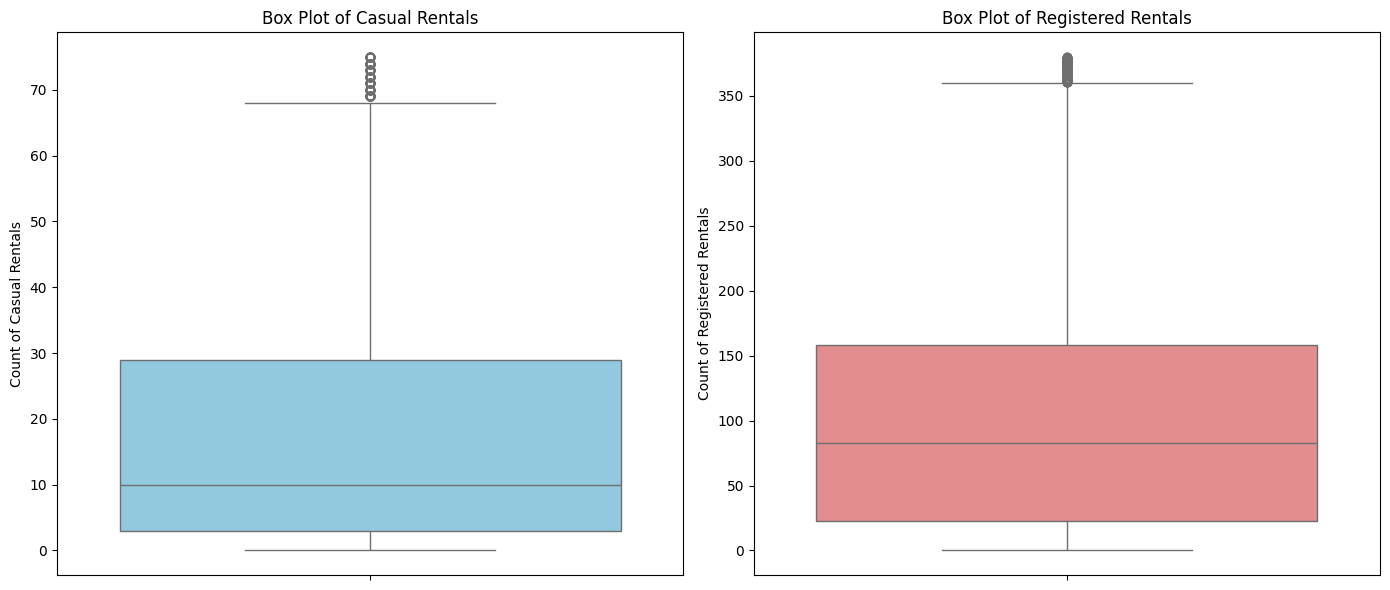

In [ ]:
# YOUR CODE HERE
plt.figure(figsize=(14, 6))
# Box plot for 'casual' rentals
plt.subplot(1, 2, 1)
sns.boxplot(y=df_final['casual'], color='skyblue')
plt.title('Box Plot of Casual Rentals')
plt.ylabel('Count of Casual Rentals')
# Box plot for 'registered' rentals
plt.subplot(1, 2, 2)
sns.boxplot(y=df_final['registered'], color='lightcoral')
plt.title('Box Plot of Registered Rentals')
plt.ylabel('Count of Registered Rentals')
plt.tight_layout()
plt.show()

In [ ]:
# YOUR CODE HERE
from sklearn.preprocessing import MinMaxScaler
# Initialize MinMaxScaler
min_max_scaler = MinMaxScaler()
print(df_final[continuous_vars].head())
# Apply MinMaxScaler to continuous variables
df_final[continuous_vars] = min_max_scaler.fit_transform(df_final[continuous_vars])
# Display the first few rows to confirm
print(df_final[continuous_vars].head())

    atemp   hum  windspeed  casual  registered  cnt
0  0.2879  0.81        0.0       3          13   16
1  0.2727  0.80        0.0       8          32   40
2  0.2727  0.80        0.0       5          27   32
3  0.2879  0.75        0.0       3          10   13
4  0.2879  0.75        0.0       0           1    1
    atemp   hum  windspeed    casual  registered       cnt
0  0.2879  0.81        0.0  0.040000    0.034211  0.033186
1  0.2727  0.80        0.0  0.106667    0.084211  0.086283
2  0.2727  0.80        0.0  0.066667    0.071053  0.068584
3  0.2879  0.75        0.0  0.040000    0.026316  0.026549
4  0.2879  0.75        0.0  0.000000    0.002632  0.000000


In [ ]:
# YOUR CODE HERE
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first') # drop='first' to avoid multicollinearity
# Fit and transform the categorical variables
encoded_vars = one_hot_encoder.fit_transform(df_final[categorical_vars])
# Get the feature names for the encoded variables
encoded_feature_names = one_hot_encoder.get_feature_names_out(categorical_vars)
# Create a DataFrame for the encoded variables
encoded_df = pd.DataFrame(encoded_vars, columns=encoded_feature_names)
# Ensure the indices align to avoid concatenation issues
encoded_df.index = df_final.index
# Concatenate the encoded variables with the original DataFrame (dropping original categorical variables)
df_encoded2 = pd.concat([df_final.drop(columns=categorical_vars), encoded_df], axis=1)
# Display the first few rows of the new DataFrame
print(df_encoded2.head(3))



   instant      dteday  temp   atemp   hum  windspeed    casual  registered  \
0        1  2011-01-01  0.24  0.2879  0.81        0.0  0.040000    0.034211   
1        2  2011-01-01  0.22  0.2727  0.80        0.0  0.106667    0.084211   
2        3  2011-01-01  0.22  0.2727  0.80        0.0  0.066667    0.071053   

        cnt  season_2  ...  weekday_1  weekday_2  weekday_3  weekday_4  \
0  0.033186       0.0  ...        0.0        0.0        0.0        0.0   
1  0.086283       0.0  ...        0.0        0.0        0.0        0.0   
2  0.068584       0.0  ...        0.0        0.0        0.0        0.0   

   weekday_5  weekday_6  workingday_1  weathersit_2  weathersit_3  \
0        0.0        1.0           0.0           0.0           0.0   
1        0.0        1.0           0.0           0.0           0.0   
2        0.0        1.0           0.0           0.0           0.0   

   weathersit_4  
0           0.0  
1           0.0  
2           0.0  

[3 rows x 58 columns]


In [ ]:
# YOUR CODE HERE
X_3 = df_encoded2[['atemp', 'hum', 'windspeed','season_2',
       'season_3', 'season_4', 'yr_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5',
       'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12',
       'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9',
       'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17',
       'hr_18', 'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23', 'holiday_1',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'workingday_1', 'weathersit_2', 'weathersit_3',
       'weathersit_4']]

y_3 = df_encoded2[['casual','registered']]
y_3_cnt = df_encoded2[['cnt']]


In [ ]:
# YOUR CODE HERE
# Split the dataset into training and testing sets without stratification
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_3, y_3_cnt, test_size=0.2, random_state=42)
# Display the shapes of the resulting datasets
print("X_train shape:", X_train3.shape)
print("X_test shape:", X_test3.shape)
print("y_train shape:", y_train3.shape)
print("y_test shape:", y_test3.shape)

X_train shape: (11197, 52)
X_test shape: (2800, 52)
y_train shape: (11197, 1)
y_test shape: (2800, 1)


In [ ]:
# YOUR CODE HERE
# Initialize the linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# Fit the model on the training data
lr.fit(X_train3, y_train3)
y_predict3 = lr.predict(X_test3)
r2 = r2_score(y_test3,y_predict3)
mse = mean_squared_error(y_test3, y_predict3)
# Display the errors
print(f"Mean Squared Error: {mse}")
print(r2)

Mean Squared Error: 0.01627693180079699
0.6838961989460188


### Report Analysis

* Describe your interpretation of the methods that are used to implement linear regression covered in this mini project.
* Comment on performance of the algorithms/methods used.
* Comment about the nature of the data and fitment of linear regression for this data.
* Can you perform a non linear curve fitting using linear regression? If yes, How?
